In [79]:
from PIL import Image
from IPython.display import display
#20635, 20601, 20632, 20598

url="/media/Gui2/thermix/ARThermal/public_dataset/Erika_002/2016-09-13_01.53.19/0.png"

%matplotlib inline
img = Image.open(url)
img
#display(img)

IOError: [Errno 2] No such file or directory: '/media/Gui2/thermix/ARThermal/public_dataset/Erika_002/2016-09-13_01.53.19/0.png'

In [36]:
#all methods for stretching an image
def imhist(im):
    m, n = im.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[im[i, j]]+=1
    return np.array(h)/(m*n)

def cumsum(h):
    # finds cumulative sum of a numpy array, list
    return [sum(h[:i+1]) for i in range(len(h))]

def histeq(im):
    #calculate Histogram
    h = imhist(im)
    cdf = np.array(cumsum(h)) #cumulative distribution function
    sk = np.uint8(255 * cdf) #finding transfer function values
    s1, s2 = im.shape
    Y = np.zeros_like(im)
    # applying transfered values for each pixels
    for i in range(0, s1):
        for j in range(0, s2):
            Y[i, j] = sk[im[i, j]]
    H = imhist(Y)
    #return transformed image, original and new istogram, 
    # and transform function
    return Y , h, H, sk

def hist_stretching(im_asarray):
    mi = im_asarray.min()
    ma = im_asarray.max()
    gap = 255 / (ma - mi)
    
    Y = np.zeros_like(im_asarray)
    s1, s2 = im_asarray.shape

    for i in range(0, s1):
        for j in range(0, s2):
            Y[i, j] = (im_asarray[i, j] - mi) * gap
    
    return Y

def stretch_image(img_path):
    image = Image.open(img_path)
    if image.mode != "RGB":
        image=image.convert("RGB")

    image = np.asarray(image) 

    r = image[:,:,0]
    eq_1 = hist_stretching(r)
    image = Image.fromarray(eq_1, 'L')

    if image.mode != "RGB":
        image=image.convert("RGB")
    
    return image

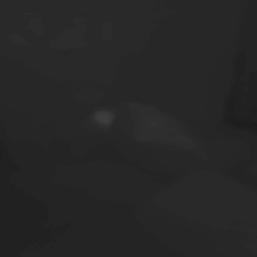

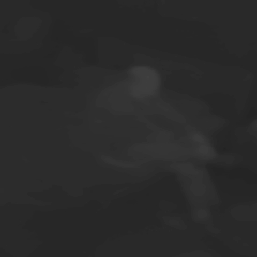

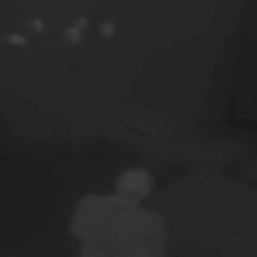

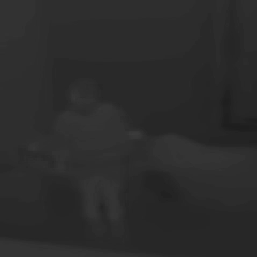

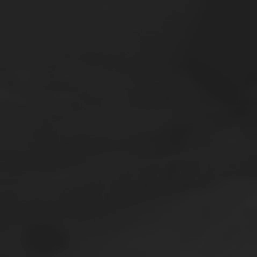

In [52]:
#select random images from dataset
import os, random

path = "/media/Gui2/thermix/ARThermal/dataset_merged/"
images_paths = []
for i in range(1,6):
    videos = [os.path.join(path,"14_tim","%d"%i, d) for d in os.listdir(os.path.join(path, "14_tim","%d"%i))]
    videos = [v for v in videos if "golden5s" in v or "black5" in v or "ipod5" in v]
    video_path = random.choice(videos)
    
    frames = [os.path.join(video_path, d) for d in os.listdir(video_path)]
    frame_path = random.choice(frames)
    images_paths.append(frame_path)
    display(Image.open(frame_path))

In [55]:
print images_paths

['/media/Gui2/thermix/ARThermal/dataset_merged/14_tim/1/Users_golden5s_unkown_2016-07-16_04%3A29%3A24.000000_1/3_0.png', '/media/Gui2/thermix/ARThermal/dataset_merged/14_tim/2/Users_ipod5_unkown_2016-07-10_12%3A55%3A43.000000_1/5_1.png', '/media/Gui2/thermix/ARThermal/dataset_merged/14_tim/3/Users_golden5s_unkown_2016-07-16_10%3A24%3A56.000000_1/4_1.png', '/media/Gui2/thermix/ARThermal/dataset_merged/14_tim/4/Users_ipod5_unkown_2016-07-19_10%3A26%3A57.000000_1/0_0.png', '/media/Gui2/thermix/ARThermal/dataset_merged/14_tim/5/Users_golden5s_unkown_2016-08-03_17%3A48%3A52.000000_1/0_2.png']


In [ ]:
#save selected images
images = ['/media/Gui2/thermix/ARThermal/dataset_merged/14_tim/1/Users_golden5s_unkown_2016-07-16_04%3A29%3A24.000000_1/3_0.png',
'/media/Gui2/thermix/ARThermal/dataset_merged/14_tim/2/Users_ipod5_unkown_2016-08-05_19%3A11%3A42.000000_2/0_2.png',
          ]
output_path = "../image_for_paper"
if not os.path.isdir(output_path):
    os.makedirs(output_path)
for i,image in enumerate(images):
    img = stretch_image(image)
    img.save(os.path.join(output_path,"%d"%(i+1)+"_2.png"))

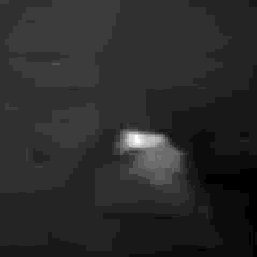

In [78]:
image = "/media/Gui2/thermix/ARThermal/frames_no_movement/Erika_002_frames_no_movement/14_tim/3/Users_black5_unkown_2016-09-14_00%3A48%3A28.000000_2/0_0.png"
img2 = stretch_image(image)
img2
#img.save("../../image_with_annotation.png")